In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn import metrics
%matplotlib inline

In [2]:
#Upload the dataset, but only two columns (tweet and bool)
train = pd.read_csv('train_val_col.csv',sep=',').filter(["tweet", "bool"])
#Rename columns
train = train.rename(columns={'bool' : 'Class_label','tweet' : 'Complete_Message'})

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10712 entries, 0 to 10711
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Complete_Message  10712 non-null  object 
 1   Class_label       10712 non-null  float64
dtypes: float64(1), object(1)
memory usage: 167.5+ KB


In [4]:
#Print the first five lines
train.head()

,Complete_Message,Class_label
0,Are you a healthcare professional with experie...,1.0
1,"ERS and @EuropeanLung join DRAGON, a new inter...",1.0
2,ERS #COVID19 resource centre is free to access...,1.0
3,"ERS and @PREPARE_EUROPE's latest webinar, whic...",1.0
4,ERS #COVID19 blog series is written by #Health...,1.0


In [5]:
#Print Class labels
np.unique(train['Class_label'])

array([0., 1., 2.])

In [6]:
#Get the number of lines and columns
train.shape

(10712, 2)

In [7]:
#Check the % of each class
train['Class_label'].value_counts(normalize=True)*100

1.0    55.554518
2.0    40.384615
0.0     4.060866
Name: Class_label, dtype: float64

In [8]:
#Generate random sample for the train dataset
train = train.sample(frac=1,random_state=1)

In [9]:
train.head()

,Complete_Message,Class_label
1569,Don't care what he has to say about it. Open t...,2.0
674,ERS #COVID19 blog series is written by #Health...,1.0
4865,#Plandemic #Scamdemic #Coronabollox #NoMasks ...,2.0
8229,"While many are staying inside during #COVID19,...",1.0
4248,#NoMasks https://twitter.com/Mareq16/status/1...,2.0


In [10]:
#Set the size of the train and test dataset
train_set_size6040 = int(train.shape[0]*0.6)
test_set_size6040 = train.shape[0] - train_set_size6040

train_set_size7030 = int(train.shape[0]*0.7)
test_set_size7030 = train.shape[0] - train_set_size7030

train_set_size8020 = int(train.shape[0]*0.8)
test_set_size8020 = train.shape[0] - train_set_size8020

In [11]:
#Division of the dataset
training6040 = train.iloc[:train_set_size6040].reset_index(drop=True)
test6040 = train.iloc[train_set_size6040:].reset_index(drop=True)

training7030 = train.iloc[:train_set_size7030].reset_index(drop=True)
test7030 = train.iloc[train_set_size7030:].reset_index(drop=True)

training8020 = train.iloc[:train_set_size8020].reset_index(drop=True)
test8020 = train.iloc[train_set_size8020:].reset_index(drop=True)

In [12]:
#Check the % of each class
training6040['Class_label'].value_counts(normalize=True)*100
training7030['Class_label'].value_counts(normalize=True)*100
training8020['Class_label'].value_counts(normalize=True)*100

1.0    55.502392
2.0    40.518147
0.0     3.979461
Name: Class_label, dtype: float64

In [13]:
#Check the % of each class
test6040['Class_label'].value_counts(normalize=True)*100
test7030['Class_label'].value_counts(normalize=True)*100
test8020['Class_label'].value_counts(normalize=True)*100

1.0    55.762949
2.0    39.850677
0.0     4.386374
Name: Class_label, dtype: float64

In [14]:
#Replace the non-words characters into ' ', and lower the upper case letters
training6040['Complete_Message'] = training6040['Complete_Message'].str.replace('\W',' ').str.lower()
training7030['Complete_Message'] = training7030['Complete_Message'].str.replace('\W',' ').str.lower()
training8020['Complete_Message'] = training8020['Complete_Message'].str.replace('\W',' ').str.lower()

In [15]:
training6040.head()
training7030.head()
training8020.head()

,Complete_Message,Class_label
0,don t care what he has to say about it open t...,2.0
1,ers covid19 blog series is written by health...,1.0
2,plandemic scamdemic coronabollox nomasks ...,2.0
3,while many are staying inside during covid19 ...,1.0
4,nomasks https twitter com mareq16 status 1...,2.0


In [16]:
#Divide the tweet into a list of tokens
training6040['Complete_Message'] = training6040['Complete_Message'].str.split()
training7030['Complete_Message'] = training7030['Complete_Message'].str.split()
training8020['Complete_Message'] = training8020['Complete_Message'].str.split()

In [17]:
#Create a vocabulary of all the words encountered
vocabulary6040 = []
for line in training6040['Complete_Message']:
    vocabulary6040.extend(line)
vocabulary_set6040 = set(vocabulary6040)
vocabular6040 = list(vocabulary_set6040)

vocabulary7030 = []
for line in training7030['Complete_Message']:
    vocabulary7030.extend(line)
vocabulary_set7030 = set(vocabulary7030)
vocabulary7030 = list(vocabulary_set7030)

vocabulary8020 = []
for line in training8020['Complete_Message']:
    vocabulary8020.extend(line)
vocabulary_set8020 = set(vocabulary8020)
vocabulary8020 = list(vocabulary_set8020)

In [18]:
vocabulary7030

['seefinish',
 'impacting',
 'garden',
 'domestically',
 'km38jbsoel',
 'homeless',
 'gvt',
 'brit',
 'bagan',
 'studi',
 'downplaying',
 'configuration',
 '33',
 'shareourheritage',
 'abvjiyw89gkf0',
 'continued',
 '3ellgva',
 'txxl50zmopu',
 'oklahoma',
 'bank',
 'examine',
 'enemy',
 'belenenses',
 '3a3zfxv',
 'rattled',
 '1282933763454971904',
 'fave',
 'inextricably',
 'drop',
 '2uwofda',
 'contrary',
 'parr',
 'champ',
 'greener',
 'ewngut7wyc',
 '2za0wys',
 'said',
 'over75s',
 'zelda_xiana',
 'context',
 'forecasting',
 'prolonged',
 'tue',
 'jt3dsikm2i',
 'preventives',
 'ethnicity',
 'chins',
 '1283022345880375298',
 '30pfeal',
 'notizie',
 'ccrtsu68zk',
 'co2',
 'gp',
 'occurring',
 'healthcareworkers',
 '8wagnre1xe',
 'thelancet',
 'nimhdcovid19',
 'pilgrims',
 'confirma',
 'okaaaay',
 'q4dnso6tvb',
 'seattletimes',
 'lxg2qp2fac',
 '2qu8xpt',
 'cotton',
 'jkkq50zmono',
 'exponential',
 'morgue',
 'dialysis',
 'newmoo41',
 'tramps',
 'tvt6au8dwv',
 'reservoir',
 '494678',
 '

In [19]:
#Creation of a dictionary with key being the word, 
#and value a list of zeros with the size of the training dataset
word_count6040 = {unique_word:[0] * len(training6040['Complete_Message']) for unique_word in vocabulary6040}

word_count7030 = {unique_word:[0] * len(training7030['Complete_Message']) for unique_word in vocabulary7030}

word_count8020 = {unique_word:[0] * len(training8020['Complete_Message']) for unique_word in vocabulary8020}

In [20]:
#Count the frequence of the words
for index,tweet in enumerate(training6040['Complete_Message']):
    for word in tweet:
        word_count6040[word][index] +=1

for index,tweet in enumerate(training7030['Complete_Message']):
    for word in tweet:
        word_count7030[word][index] +=1

for index,tweet in enumerate(training8020['Complete_Message']):
    for word in tweet:
        word_count8020[word][index] +=1

In [21]:
word_count6040_df = pd.DataFrame(word_count6040)
word_count7030_df = pd.DataFrame(word_count7030)
word_count8020_df = pd.DataFrame(word_count8020)
word_count7030_df

,seefinish,impacting,garden,domestically,km38jbsoel,homeless,gvt,brit,bagan,studi,...,shooting,swing,mar,rants,stay,d2rhxbi4ls,hint,transfusions,testagem,yoqf50ywslb
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
training6040 = pd.concat([training6040,word_count6040_df],axis=1)
training7030 = pd.concat([training7030,word_count7030_df],axis=1)
training8020 = pd.concat([training8020,word_count8020_df],axis=1)
training7030

,Complete_Message,Class_label,seefinish,impacting,garden,domestically,km38jbsoel,homeless,gvt,brit,...,shooting,swing,mar,rants,stay,d2rhxbi4ls,hint,transfusions,testagem,yoqf50ywslb
0,"[don, t, care, what, he, has, to, say, about, ...",2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[ers, covid19, blog, series, is, written, by, ...",1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[plandemic, scamdemic, coronabollox, nomasks, ...",2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[while, many, are, staying, inside, during, co...",1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"[nomasks, https, twitter, com, mareq16, status...",2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,"[i, ve, seen, claims, that, masks, give, a, fa...",2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7494,"[happy, birthday, to, un, messenger, of, peace...",1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7495,"[just, read, through, a, bunch, of, nomasks, t...",2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,"[society, covid, 19, patients, authorized, to,...",0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


*Calculo das Probabilidades*

In [23]:
pRumour6040 = sum(training6040['Class_label']==0)/len(training6040['Class_label'])
pRumour7030 = sum(training7030['Class_label']==0)/len(training7030['Class_label'])
pRumour8020 = sum(training8020['Class_label']==0)/len(training8020['Class_label'])
pRumour7030

0.04094425180048013

In [24]:
pUncertain6040 = sum(training6040['Class_label']==2)/len(training6040['Class_label'])
pUncertain7030 = sum(training7030['Class_label']==2)/len(training7030['Class_label'])
pUncertain8020 = sum(training8020['Class_label']==2)/len(training8020['Class_label'])
pUncertain7030

0.4089090424113097

In [25]:
pValid6040 = sum(training6040['Class_label']==1)/len(training6040['Class_label'])
pValid7030 = sum(training7030['Class_label']==1)/len(training7030['Class_label'])
pValid8020 = sum(training8020['Class_label']==1)/len(training8020['Class_label'])
pValid7030

0.5501467057882102

In [26]:
n_rumour6040 = training6040[training6040['Class_label']==0]['Complete_Message'].apply(len).sum()
n_rumour7030 = training7030[training7030['Class_label']==0]['Complete_Message'].apply(len).sum()
n_rumour8020 = training8020[training8020['Class_label']==0]['Complete_Message'].apply(len).sum()
n_rumour7030

10500

In [27]:
n_Uncertain6040 = training6040[training6040['Class_label']==2]['Complete_Message'].apply(len).sum()
n_Uncertain7030 = training7030[training7030['Class_label']==2]['Complete_Message'].apply(len).sum()
n_Uncertain8020 = training8020[training8020['Class_label']==2]['Complete_Message'].apply(len).sum()
n_Uncertain7030

80752

In [28]:
n_valid6040 = training6040[training6040['Class_label']==1]['Complete_Message'].apply(len).sum()
n_valid7030 = training7030[training7030['Class_label']==1]['Complete_Message'].apply(len).sum()
n_valid8020 = training8020[training8020['Class_label']==1]['Complete_Message'].apply(len).sum()
n_valid7030

153452

In [29]:
n_vocabulary6040 = len(vocabulary6040)
n_vocabulary7030 = len(vocabulary7030)
n_vocabulary8020 = len(vocabulary8020)
n_vocabulary7030

19869

In [41]:
alphaL = np.arange(0,1.5,0.1)
alphaL

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4])

Calculo dos Parametros

In [42]:
training_rumour6040 = training6040[training6040['Class_label']==0]
training_valid6040 = training6040[training6040['Class_label']==1]
training_uncertain6040 = training6040[training6040['Class_label']==2]

training_rumour7030 = training7030[training7030['Class_label']==0]
training_valid7030 = training7030[training7030['Class_label']==1]
training_uncertain7030 = training7030[training7030['Class_label']==2]

training_rumour8020 = training8020[training8020['Class_label']==0]
training_valid8020 = training8020[training8020['Class_label']==1]
training_uncertain8020 = training8020[training8020['Class_label']==2]

In [43]:
def calc_conditional_probability(alpha,training_rumour,training_valid,vocabulary,n_rumour,n_vocabulary,n_valid,training_uncertain,n_uncertain):
    #Calculation of the divisors for eache class
    divRumour = (n_rumour + alpha * n_vocabulary)
    divValid = (n_valid + alpha * n_vocabulary)
    divUncertain = (n_uncertain + alpha * n_vocabulary)
    
    #Creation of the dictionary, with the finality 
    #of storing a word and its probability
    p_rumour_dict = dict()
    p_valid_dict = dict()
    p_uncertain_dict = dict()
    
    #Iterate by the words present in the vocabulary
    for word in vocabulary:
        #Get the total occurences of a word in each class,
        #if there is no value it will be assumed as 0
        auxR = training_rumour[word].sum(min_count = 0)
        auxV = training_valid[word].sum(min_count = 0)
        auxU = training_uncertain[word].sum(min_count = 0)
        #Calculate the probability of a given word and store it in the dictionary
        p_rumour_dict[word] = (auxR + alpha)/divRumour
        p_valid_dict[word] = (auxV + alpha)/divValid
        p_uncertain_dict[word] = (auxU + alpha)/divUncertain
        
    return p_rumour_dict,p_valid_dict,p_uncertain_dict

Classificação de novas mensagens

In [44]:
def classify_messages(message,p_rumour_dict,p_valid_dict,p_uncertain_dict,pRumour,pValid,pUncertain):
    #Treat the tweet as it was done for the train dataset
    message = re.sub('\W', ' ', message)
    message = message.lower()
    message = message.split()

    p_rumour_message = pRumour
    p_valid_message = pValid
    p_uncertain_message = pUncertain
    
    #Calculation of the probability of a tweet in a each class
    for word in message:
        if word in p_rumour_dict:
            p_rumour_message *= p_rumour_dict[word]
        if word in p_valid_dict:
            p_valid_message *= p_valid_dict[word]
        if word in p_uncertain_dict:
            p_uncertain_message *= p_uncertain_dict[word]
            
    #print('P(Rumour|message):', p_rumour_message)
    #print('P(Valid|message):', p_valid_message)
    
    #Determination of the class for the calculated tweet
    if p_valid_message > p_rumour_message and p_valid_message > p_uncertain_message:
        return int(1)
    elif p_rumour_message > p_valid_message and p_rumour_message > p_uncertain_message:
        return int(0)
    elif p_uncertain_message > p_valid_message and p_uncertain_message > p_rumour_message:
        return int(2)
    else:
        return int(2)     

Medição da accuracy

In [45]:
def accuracy_calc(test):
    correct = 0
    total = test.shape[0]

    for _,row in test.iterrows():
        if row['Class_label'] == row['Prediction']:
            correct += 1
        
    accuracy = correct/total
    return accuracy

Graph Generation

In [46]:
test6040['Prediction'] = 0
test7030['Prediction'] = 0
test8020['Prediction'] = 0
def get_accuracy(test,training_rumour,training_valid,training_uncertain,vocabulary,n_rumour,n_uncertain,n_vocabulary,n_valid,pRumour,pValid,pUncertain):
    accuracy_val = dict()
    #Iterate through the values of alpha
    for alpha in alphaL:
        #Calculate the conditional probability for each class
        p_rumour_dict,p_valid_dict,p_uncertain_dict = calc_conditional_probability(alpha,training_rumour,training_valid,vocabulary,n_rumour,n_vocabulary,n_valid,training_uncertain,n_uncertain)
        
        #Iterate through the test daset and proceed to the classification
        for index,message in enumerate(test['Complete_Message']):
            #Classify each tweet from the test dataset
            test.loc[index,'Prediction'] = classify_messages(message,p_rumour_dict,p_valid_dict,p_uncertain_dict,pRumour,pValid,pUncertain)
        #Store the accuracy from each value of alpha
        accuracy_val[alpha] = accuracy_calc(test)
    
    return accuracy_val  

In [47]:
#Store the alpha/accuracy dictionary
accuracy_val6040 = get_accuracy(test6040,training_rumour6040,training_valid6040,training_uncertain6040,vocabulary6040,n_rumour6040,n_Uncertain6040,n_vocabulary6040,n_valid6040,pRumour6040,pValid6040,pUncertain6040)
accuracy_val7030 = get_accuracy(test7030,training_rumour7030,training_valid7030,training_uncertain7030,vocabulary7030,n_rumour7030,n_Uncertain7030,n_vocabulary7030,n_valid7030,pRumour7030,pValid7030,pUncertain7030)
accuracy_val8020 = get_accuracy(test8020,training_rumour8020,training_valid8020,training_uncertain8020,vocabulary8020,n_rumour8020,n_Uncertain8020,n_vocabulary8020,n_valid8020,pRumour8020,pValid8020,pUncertain8020)

#list the dictionary
lists6040 = accuracy_val6040.items()
lists7030 = accuracy_val7030.items()
lists8020 = accuracy_val8020.items()

#Unzip the list
alphaV6040,accV6040 = zip(*lists6040)
alphaV7030,accV7030 = zip(*lists7030)
alphaV8020,accV8020 = zip(*lists8020)

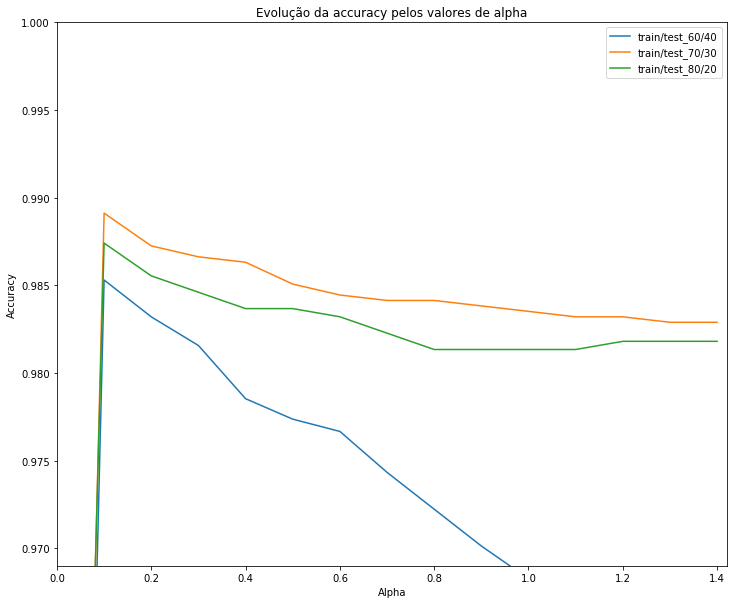

In [48]:
def gen_plot():
    plt.figure(figsize=(12,10))
    plt.axis([0,1.42,0.969,1])
    plt.plot(alphaV6040,accV6040,label='train/test_60/40')
    plt.plot(alphaV7030,accV7030,label='train/test_70/30')
    plt.plot(alphaV8020,accV8020,label='train/test_80/20')
    plt.title('Evolução da accuracy pelos valores de alpha')
    plt.ylabel('Accuracy')
    plt.xlabel('Alpha')
    plt.legend()
    plt.show()
    
gen_plot()

Statistical Report

In [49]:
y_real6040 = test6040['Class_label']
y_pred6040 = test6040['Prediction']

y_real7030 = test7030['Class_label']
y_pred7030 = test7030['Prediction']

y_real8020 = test8020['Class_label']
y_pred8020 = test8020['Prediction']

#Generate Report for the last alpha calculated
report_confusion_matrix6040 = metrics.classification_report(y_pred6040,y_real6040,output_dict=True)
report_confusion_matrix_df6040 = pd.DataFrame(report_confusion_matrix6040).transpose()

report_confusion_matrix7030 = metrics.classification_report(y_pred7030,y_real7030,output_dict=True)
report_confusion_matrix_df7030 = pd.DataFrame(report_confusion_matrix7030).transpose()

report_confusion_matrix8020 = metrics.classification_report(y_pred8020,y_real8020,output_dict=True)
report_confusion_matrix_df8020 = pd.DataFrame(report_confusion_matrix8020).transpose()

report_confusion_matrix_df7030

,precision,recall,f1-score,support
0,0.695312,0.956989,0.805430,93.000000
1,0.995071,0.979515,0.987232,1855.000000
2,0.994444,0.989731,0.992082,1266.000000
accuracy,0.982887,0.982887,0.982887,0.982887
macro avg,0.894943,0.975412,0.928248,3214.000000
weighted avg,0.986151,0.982887,0.983882,3214.000000
